Pokémon JSON Setup
--------------------------

Run your python code to crawl the Pokémon web site but pull down all 807 Pokémon into the __pokeapi__ table in your personal PostgreSQL server.  Then work through this notebook to read data from your personal PostgreSQL server.  Here is some sample JSON that comes back from the API: https://pokeapi.co/api/v2/pokemon/42 - you can look at this JSON to figure out the schema of the JSON.


In [1]:
# https://www.pg4e.com/code/ipynb/04-pokejson.ipynb

import psycopg2
import pandas as pd

In [2]:
sql_string = None
# sql_string = 'dbname=readonly user=readonly password=secret_xyzzy host=pg.pg4e.com port=5432'
    
# If we leave sql_string as None, we can use hidden.py - but this only works for demo/test - not autograder
if sql_string is None:
    raise Exception('You need to define your sql_string')

PostgreSQL connection data taken from hidden.py


In [3]:
# Make the connection and cursor
conn = psycopg2.connect(sql_string, connect_timeout=3)

In [4]:
sql = "SELECT count(*) FROM pokeapi;"
df = pd.read_sql_query(sql, conn)
assert df['count'][0] == 807

In [5]:
df.head()

,count
0,807


In [6]:
sql = "SELECT body->>'name' AS name, (body->'weight')::int AS weight FROM pokeapi LIMIT 10;"
df = pd.read_sql_query(sql, conn)
df.head()

,name,weight
0,bulbasaur,69
1,ivysaur,130
2,venusaur,1000
3,charmander,85
4,charmeleon,190


In [7]:
df['weight'].plot(kind='bar')

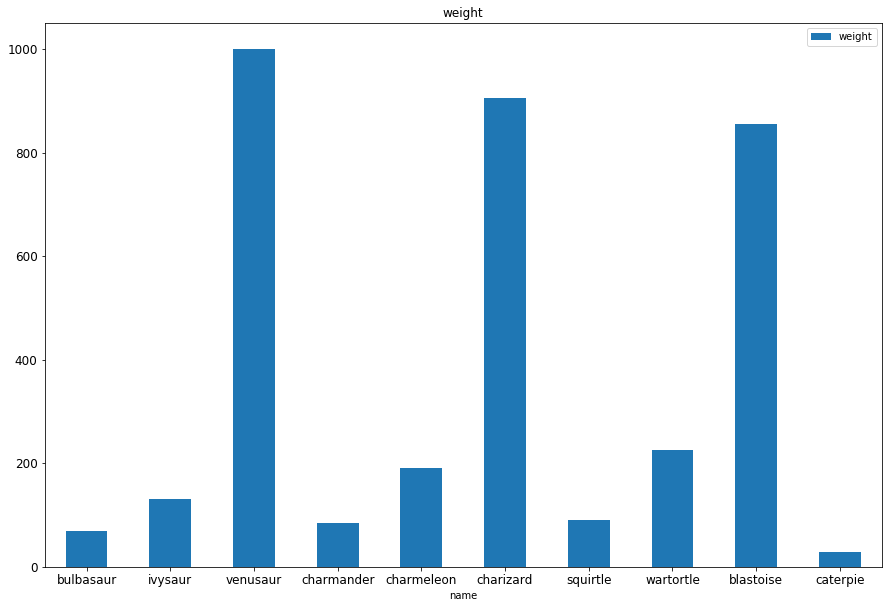

In [8]:
# https://stackoverflow.com/questions/38683709/python-pandas-how-to-set-dataframe-column-value-as-x-axis-labels
df.set_index('name').plot.bar(rot=0, title='weight', figsize=(15,10), fontsize=12)

In [9]:
sql = "SELECT (body->>'height')::int AS height, (body->'weight')::int AS weight FROM pokeapi LIMIT 10;"
df = pd.read_sql_query(sql, conn)
df.head()

,height,weight
0,7,69
1,10,130
2,20,1000
3,6,85
4,11,190


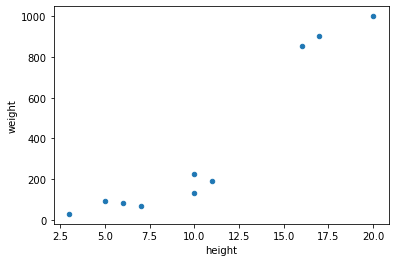

In [10]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

df.plot.scatter(x='height', y='weight')

In [11]:
# Write a query to return four columns
# id - The id of the pokemon
# exp - The base_experience value from the json body converted to an integer
# height - The height value from the json body converted to an integer
# weight - The weight value from the json body converted to an integer
# Return all the rows of data (i.e. no limit)
# Sort the returned rows by the id of the pokemon

### BEGIN SOLUTION
sql = None
### END SOLUTION

In [12]:
df = pd.read_sql_query(sql, conn)
df.head()

,exp,height,weight
0,64,7,69
1,142,10,130
2,236,20,1000
3,62,6,85
4,142,11,190


In [13]:
assert df['exp'].count() == 807

assert df['exp'][0] == 64
assert df['height'][0] == 7
assert df['weight'][0] == 69

### BEGIN HIDDEN TESTS
assert df['exp'][4] == 142
assert df['height'][4] == 11
assert df['weight'][4] == 190
### END HIDDEN TESTS

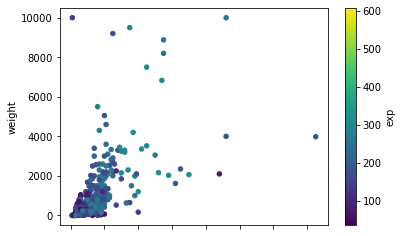

In [14]:
df.plot.scatter(x='height', y='weight', c='exp', colormap='viridis')